# 1) Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 2) Read in and Explore the Data
It's time to read in our training and testing data using pd.read_csv, and take a first look at the training data using the describe() function.

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 3) Data Analysis
We're going to consider the features in the dataset and how complete they are.

In [3]:
# Get a list of the features within the dataset (print all the cols)
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
# Check a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S


- Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- Categorical Features: Survived, Sex, Embarked, Pclass
- Alphanumeric Features: Ticket, Cabin

**What are the data types for each feature?**
- Survived: int
- Pclass: int
- Name: string
- Sex: string
- Age: float
- SibSp: int
- Parch: int
- Ticket: string
- Fare: float
- Cabin: string
- Embarked: string

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of them.

In [5]:
# See a summary of the training dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Some Observations:
- There are a total of 891 passengers in our training set.
- The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
- The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
- The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [6]:
# Check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We can see that except for the abovementioned missing values, no NaN values exist.

### Some Predictions:
- Sex: Females are more likely to survive.
- SibSp/Parch: People traveling alone are more likely to survive.
- Age: Young children are more likely to survive.
- Pclass: People of higher socioeconomic class are more likely to survive.

# 4) Data Visualization
It's time to visualize our data so we can see whether our predictions were accurate!

**Sex Feature**

Percentage of females who survived 74.20382165605095
Percentage of males who survived 18.890814558058924


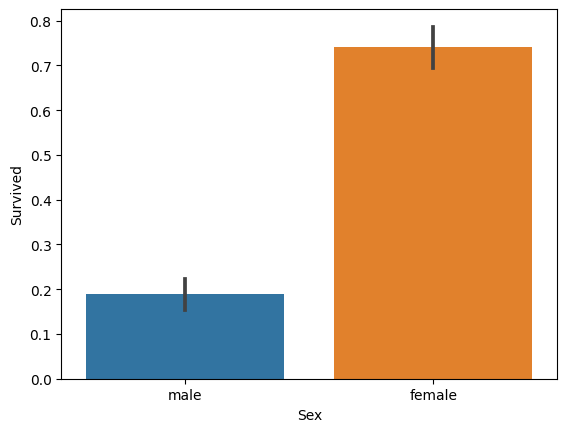

In [7]:
# draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived",data=train)

#print percentages of females vs.males that survive
print("Percentage of females who survived",
      train["Survived"][train["Sex"] == "female"].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived",
      train["Survived"][train["Sex"] == "male"].value_counts(normalize = True)[1]*100)

As predicted, females have a much higher chance of survival than males.
The Sex feature is essential in our predictions.

**Pclass Feature**

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


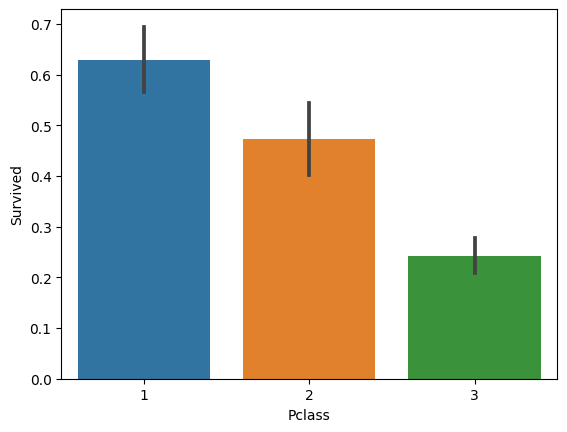

In [8]:
# Draw a bar plot of survival by Pclass
sns.barplot(x="Pclass",y="Survived",data=train)

# Print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train.Survived [train.Pclass == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", train.Survived [train.Pclass == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", train.Survived [train.Pclass == 3].value_counts(normalize = True)[1]*100)

As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

### SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


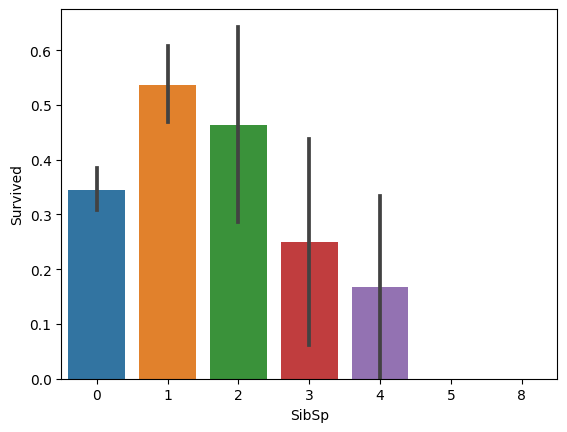

In [9]:
# Draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived",data=train)

# I won't be printig individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:",
      train.Survived [train.SibSp == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:",
     train.Survived [train.SibSp == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:",
     train.Survived [train.SibSp == 2].value_counts(normalize = True)[1]*100)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)


### Parch Feature

<function matplotlib.pyplot.show(close=None, block=None)>

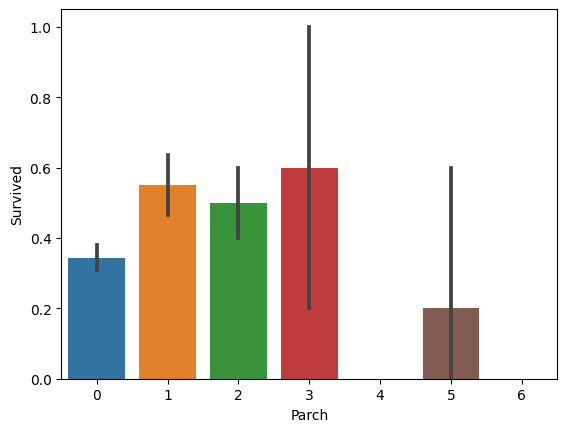

In [10]:
# Draw a bar plet for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.


### Age feature

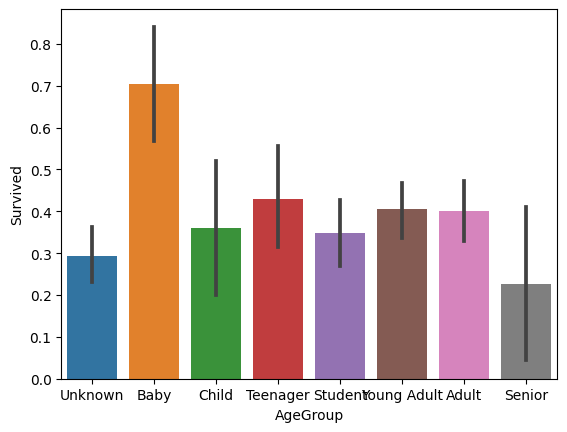

In [11]:
# Sort lines into logical categories
train["age"] = train["Age"].fillna(-0.5)
test["age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Senior"]
train["AgeGroup"] = pd.cut(train["age"], bins, labels = labels)
test["AgeGroup"] = pd.cut(train["age"], bins, labels = labels)

# Draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Babies are more likely to survive than any other age group.

### Cabin Feature
I think the idea here is that people with recorded cabin numbers are of higher socioeconomic class, and thus more likely to survive. 

Percentage of CabinBool = 0 who survived: 29.985443959243085
Percentage of CabinBool = 1 who survived: 66.66666666666666


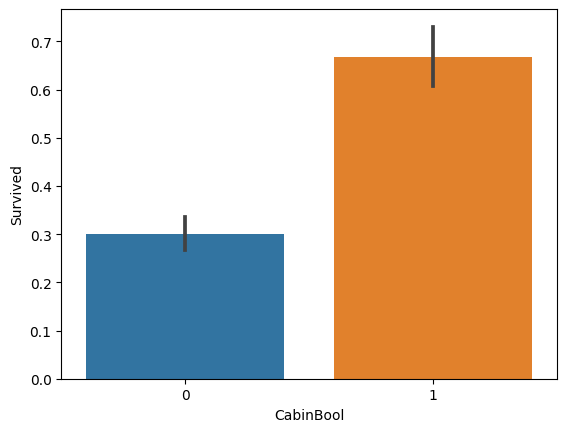

In [12]:
train["CabinBool"] = (train["Cabin"].notnull().astype("int"))
test["CabinBool"] = (train["Cabin"].notnull().astype("int"))

# Calculate percentage of CabinBool vs. survived
print("Percentage of CabinBool = 0 who survived:",
      train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 1 who survived:",
     train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

# draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

People with a recorded Cabin number are, in fact, more likely to survive. (66.6% vs 29.9%)

# 5) Cleaning Data
Time to clean our data to account for missing values and unnecessary information.

### Looking at the Test Data
Let's see how our test data looks!

In [13]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN,100,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,23.941388,NaN,0.220096
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,17.741080,NaN,0.414807
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,-0.500000,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,9.000000,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,24.000000,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,35.750000,NaN,0.000000


- We have a total of 418 passengers.
- 1 value from the Fare feature is missing.
- Around 20.5% of the Age feature is missing, we will need to fill that in.

#### Cabin Feature

In [14]:
# We'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)

#### Ticket Feature

In [15]:
# We can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(["Ticket"], axis = 1)
test = test.drop(["Ticket"], axis = 1)

#### Embarked Feature

In [16]:
# Now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [17]:
# Replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

#### Age Feature

Next we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.

In [18]:
# Create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract(" ([A-za-z]+)\.", expand=False)
    
pd.crosstab(train["Title"], train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
# Replace various titles with more common names
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Capt", "Col","Don",
                                                 "Dr", "Major", "Rev", "Jonkheer",
                                                 "Dona"], "Rare")
    dataset["Title"] = dataset["Title"].replace(["Countess", "Lady", "Sir"], "Royal")
    dataset["Title"] = dataset["Title"].replace(["Mlle", "Ms"], "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    
train[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [20]:
# Map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,22.0,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,38.0,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,26.0,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,35.0,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,35.0,Young Adult,0,1


Next, we'll try to predict the missing Age values from the most common age for their Title.

In [21]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode()     # Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode()   # Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()    # Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() # Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()  # Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode()   # Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}


train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

it's time to map each age group to a numerical value.

In [22]:
# Map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

# Dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

#### Name Feature
We can drop the name feature now that we've extracted the titles.

In [23]:
# Drop the name feature since it contains no more useful information.
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis = 1)

#### Sex Feature

In [24]:
# Map each Sex value to a numerical value
sex_mapping = {"female": 0, "male": 1}
train["Sex"] = train["Sex"].map(sex_mapping)
test["Sex"] = test["Sex"].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,age,AgeGroup,CabinBool,Title
0,1,0,3,1,1,0,7.2500,S,22.0,4.0,0,1
1,2,1,1,0,1,0,71.2833,C,38.0,6.0,1,3
2,3,1,3,0,0,0,7.9250,S,26.0,5.0,0,2
3,4,1,1,0,1,0,53.1000,S,35.0,5.0,1,3
4,5,0,3,1,0,0,8.0500,S,35.0,5.0,0,1


#### Embarked Feature

In [25]:
# Map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,age,AgeGroup,CabinBool,Title
0,1,0,3,1,1,0,7.2500,1,22.0,4.0,0,1
1,2,1,1,0,1,0,71.2833,2,38.0,6.0,1,3
2,3,1,3,0,0,0,7.9250,1,26.0,5.0,0,2
3,4,1,1,0,1,0,53.1000,1,35.0,5.0,1,3
4,5,0,3,1,0,0,8.0500,1,35.0,5.0,0,1


#### Fare Feature
It's time to separate the fare values into some logical groups as well as filling in the single missing value in the test dataset.